<a href="https://colab.research.google.com/github/OleksiiLozovyi/goit-ds-hw-05/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
url_excel = "https://docs.google.com/spreadsheets/d/1aT-w132JTEIL4xIJq_FgHQklJDZQFOPSTNJS8haGHeE/export?format=xlsx&id=1aT-w132JTEIL4xIJq_FgHQklJDZQFOPSTNJS8haGHeE"
df = pd.read_excel(url_excel, engine='openpyxl')
print(df.to_string(index=False))

                                                                                                                         Name                             Author         User Rating  Reviews  Price  Year       Genre
                                                                                                10-Day Green Smoothie Cleanse                           JJ Smith 2024-07-04 00:00:00    17350      8  2016 Non Fiction
                                                                                                            11/22/63: A Novel                       Stephen King 2024-06-04 00:00:00     2052     22  2011     Fiction
                                                                                      12 Rules for Life: An Antidote to Chaos                 Jordan B. Peterson 2024-07-04 00:00:00    18979     15  2018 Non Fiction
                                                                                                       1984 (Signet Classics)               

In [ ]:
print(df.head())

                                                Name                    Author  \
0                      10-Day Green Smoothie Cleanse                  JJ Smith   
1                                  11/22/63: A Novel              Stephen King   
2            12 Rules for Life: An Antidote to Chaos        Jordan B. Peterson   
3                             1984 (Signet Classics)             George Orwell   
4  5,000 Awesome Facts (About Everything!) (Natio...  National Geographic Kids   

           User Rating  Reviews  Price  Year        Genre  
0  2024-07-04 00:00:00    17350      8  2016  Non Fiction  
1  2024-06-04 00:00:00     2052     22  2011      Fiction  
2  2024-07-04 00:00:00    18979     15  2018  Non Fiction  
3  2024-07-04 00:00:00    21424      6  2017      Fiction  
4  2024-08-04 00:00:00     7665     12  2019  Non Fiction  


In [ ]:
print(f"Розміри датасету: {df.shape}")

Розміри датасету: (550, 7)


In [ ]:
rows, columns = df.shape
print(f"Датасет зберігає дані про {rows} книг.")

Датасет зберігає дані про 550 книг.


In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.head())

                                                name                    author  \
0                      10-Day Green Smoothie Cleanse                  JJ Smith   
1                                  11/22/63: A Novel              Stephen King   
2            12 Rules for Life: An Antidote to Chaos        Jordan B. Peterson   
3                             1984 (Signet Classics)             George Orwell   
4  5,000 Awesome Facts (About Everything!) (Natio...  National Geographic Kids   

           user_rating  reviews  price  year        genre  
0  2024-07-04 00:00:00    17350      8  2016  Non Fiction  
1  2024-06-04 00:00:00     2052     22  2011      Fiction  
2  2024-07-04 00:00:00    18979     15  2018  Non Fiction  
3  2024-07-04 00:00:00    21424      6  2017      Fiction  
4  2024-08-04 00:00:00     7665     12  2019  Non Fiction  


In [ ]:
missing_data = df.isna().sum()
print(missing_data)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [ ]:
unique_genres = df['genre'].unique()
print("Унікальні значення в колонці 'genre':", unique_genres)

Унікальні значення в колонці 'genre': ['Non Fiction' 'Fiction']


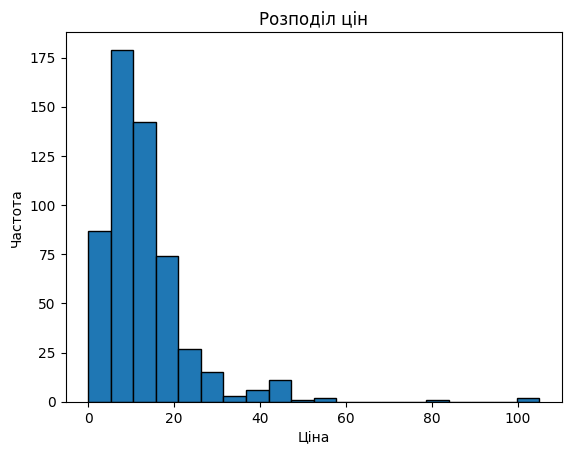

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [ ]:
df['price'].plot(kind='hist', bins=20, edgecolor='black', title='Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")

In [ ]:
df['user_rating'] = pd.to_numeric(df['user_rating'], errors='coerce')
max_rate = df['user_rating'].max()
print(f"Найвищий рейтинг: {max_rate}")

books_with_max_rate = df[df['user_rating'] == max_rate]
print(f"Кількість книг з найвищим рейтингом {max_rate}: {books_with_max_rate.shape[0]}")

book_with_most_reviews = df.loc[df['reviews'].idxmax()]
print(f"Книга з найбільше відгуками: {book_with_most_reviews['name']} з {book_with_most_reviews['reviews']} відгуками")

top_50_2015 = df[df['year'] == 2015].nlargest(50, 'price')
most_expensive_book_2015 = top_50_2015.loc[top_50_2015['price'].idxmax()]
print(f"Найдорожча книга в Топ-50 2015 року: {most_expensive_book_2015['name']} з ціною {most_expensive_book_2015['price']}")

top_50_2010_fiction = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].nlargest(50, 'user_rating')
print(f"Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: {top_50_2010_fiction.shape[0]}")

books_with_rating_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
print(f"Кількість книг з рейтингом 4.9, що потрапили до рейтингу в 2010 та 2011 роках: {books_with_rating_4_9.shape[0]}")

sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
print("Остання книга у відсортованому списку за ціною в 2015 році та дешевше за 8 доларів:", sorted_books_2015_under_8.iloc[-1]['name'])


Найвищий рейтинг: 4.0
Кількість книг з найвищим рейтингом 4.0: 14
Книга з найбільше відгуками: Where the Crawdads Sing з 87841 відгуками
Найдорожча книга в Топ-50 2015 року: Publication Manual of the American Psychological Association, 6th Edition з ціною 46
Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: 20
Кількість книг з рейтингом 4.9, що потрапили до рейтингу в 2010 та 2011 роках: 0
Остання книга у відсортованому списку за ціною в 2015 році та дешевше за 8 доларів: Old School (Diary of a Wimpy Kid #10)


In [ ]:
price_stats = df.groupby('genre').agg({'price': ['min', 'max']})
print(price_stats)

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


In [ ]:
books_by_author = df.groupby('author').agg({'name': 'count'}).reset_index()
books_by_author.rename(columns={'name': 'book_count'}, inplace=True)
print(books_by_author)

                                 author  book_count
0                      Abraham Verghese           2
1                        Adam Gasiewski           1
2                         Adam Mansbach           1
3                             Adir Levy           1
4            Admiral William H. McRaven           1
5           Adult Coloring Book Designs           1
6                            Alan Moore           1
7                      Alex Michaelides           1
8                        Alice Schertle           1
9                           Allie Brosh           1
10     American Psychiatric Association           2
11   American Psychological Association          10
12                          Amor Towles           1
13                            Amy Ramos           2
14                          Amy Shields           1
15                            Andy Weir           1
16                          Angie Grace           1
17                         Angie Thomas           1
18          

In [ ]:
average_rating_by_author = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
print(average_rating_by_author)

                                 author  user_rating
0                      Abraham Verghese          NaN
1                        Adam Gasiewski          NaN
2                         Adam Mansbach          NaN
3                             Adir Levy          NaN
4            Admiral William H. McRaven          NaN
5           Adult Coloring Book Designs          NaN
6                            Alan Moore          NaN
7                      Alex Michaelides          NaN
8                        Alice Schertle          NaN
9                           Allie Brosh          NaN
10     American Psychiatric Association          NaN
11   American Psychological Association          NaN
12                          Amor Towles          NaN
13                            Amy Ramos          NaN
14                          Amy Shields          NaN
15                            Andy Weir          NaN
16                          Angie Grace          NaN
17                         Angie Thomas       

In [ ]:
fiction_books = df[df['genre'] == 'Fiction']
max_fiction_price = fiction_books['price'].max()
min_fiction_price = fiction_books['price'].min()

# Фільтруємо за жанром 'Non Fiction' та обчислюємо максимальну та мінімальну ціну
non_fiction_books = df[df['genre'] == 'Non Fiction']
max_non_fiction_price = non_fiction_books['price'].max()
min_non_fiction_price = non_fiction_books['price'].min()

print(f"Максимальна ціна для жанру Fiction: {max_fiction_price}")
print(f"Мінімальна ціна для жанру Fiction: {min_fiction_price}")
print(f"Максимальна ціна для жанру Non Fiction: {max_non_fiction_price}")
print(f"Мінімальна ціна для жанру Non Fiction: {min_non_fiction_price}")

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


In [ ]:
sorted_author_stats = author_stats.sort_values(by=['book_count', 'user_rating'])
print(sorted_author_stats)

                                    book_count  user_rating
author                                                     
Muriel Barbery                               1          4.0
Adam Gasiewski                               1          NaN
Adam Mansbach                                1          NaN
Adir Levy                                    1          NaN
Admiral William H. McRaven                   1          NaN
Adult Coloring Book Designs                  1          NaN
Alan Moore                                   1          NaN
Alex Michaelides                             1          NaN
Alice Schertle                               1          NaN
Allie Brosh                                  1          NaN
Amor Towles                                  1          NaN
Amy Shields                                  1          NaN
Andy Weir                                    1          NaN
Angie Grace                                  1          NaN
Angie Thomas                            

In [ ]:
authors_books_count = df.groupby('author').agg(books_count=('name', 'count')).reset_index()
print(authors_books_count)
table_shape = authors_books_count.shape
print(f"Розмірність таблиці: {table_shape}")
author_most_books = authors_books_count.loc[authors_books_count['books_count'].idxmax()]
print(f"Автор з найбільшою кількістю книг: {author_most_books['author']}")
most_books_count = author_most_books['books_count']
print(f"Кількість книг цього автора: {most_books_count}")


                                 author  books_count
0                      Abraham Verghese            2
1                        Adam Gasiewski            1
2                         Adam Mansbach            1
3                             Adir Levy            1
4            Admiral William H. McRaven            1
5           Adult Coloring Book Designs            1
6                            Alan Moore            1
7                      Alex Michaelides            1
8                        Alice Schertle            1
9                           Allie Brosh            1
10     American Psychiatric Association            2
11   American Psychological Association           10
12                          Amor Towles            1
13                            Amy Ramos            2
14                          Amy Shields            1
15                            Andy Weir            1
16                          Angie Grace            1
17                         Angie Thomas       

In [ ]:
authors_avg_rating = df.groupby('author').agg(avg_rating=('user_rating', 'mean')).reset_index()
print(authors_avg_rating)
author_min_avg_rating = authors_avg_rating.loc[authors_avg_rating['avg_rating'].idxmin()]
print(f"Автор з мінімальним середнім рейтингом: {author_min_avg_rating['author']}")
min_avg_rating = author_min_avg_rating['avg_rating']
print(f"Середній рейтинг цього автора: {min_avg_rating}")
authors_combined = pd.concat([authors_books_count.set_index('author'), authors_avg_rating.set_index('author')], axis=1).reset_index()
print(authors_combined)
authors_sorted = authors_combined.sort_values(by=['books_count', 'avg_rating'], ascending=[True, True])
print(authors_sorted)
first_author = authors_sorted.iloc[0]['author']
print(f"Автор, який перший у списку: {first_author}")

                                 author  avg_rating
0                      Abraham Verghese         NaN
1                        Adam Gasiewski         NaN
2                         Adam Mansbach         NaN
3                             Adir Levy         NaN
4            Admiral William H. McRaven         NaN
5           Adult Coloring Book Designs         NaN
6                            Alan Moore         NaN
7                      Alex Michaelides         NaN
8                        Alice Schertle         NaN
9                           Allie Brosh         NaN
10     American Psychiatric Association         NaN
11   American Psychological Association         NaN
12                          Amor Towles         NaN
13                            Amy Ramos         NaN
14                          Amy Shields         NaN
15                            Andy Weir         NaN
16                          Angie Grace         NaN
17                         Angie Thomas         NaN
18          

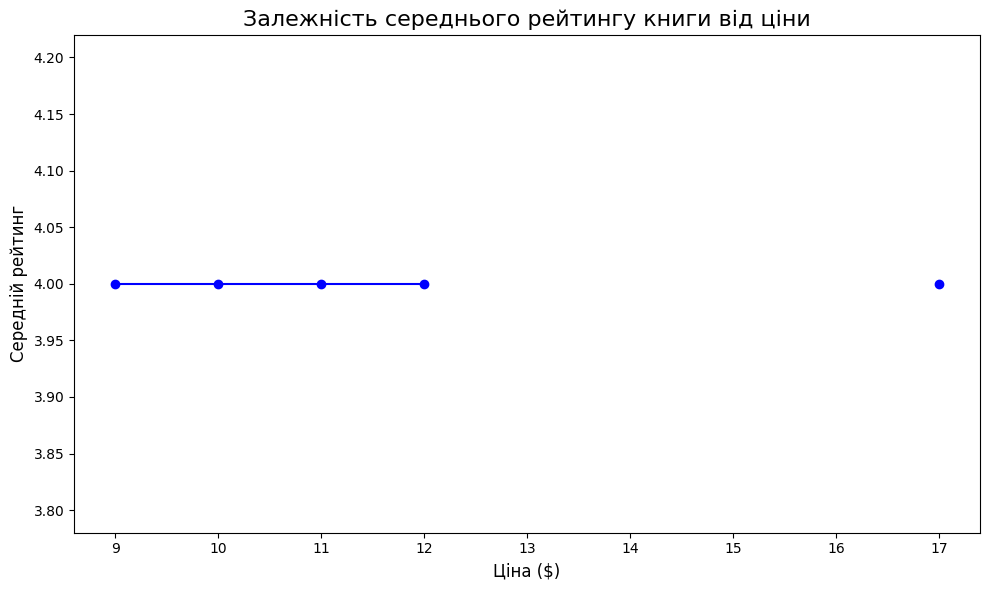

In [ ]:
average_rating_by_price = df.groupby('price')['user_rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_rating_by_price.index, average_rating_by_price.values, marker='o', linestyle='-', color='b')

plt.title('Залежність середнього рейтингу книги від ціни', fontsize=16)
plt.xlabel('Ціна ($)', fontsize=12)
plt.ylabel('Середній рейтинг', fontsize=12)


plt.tight_layout()
plt.show()